
Distribution of restaurants across countries:
Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64


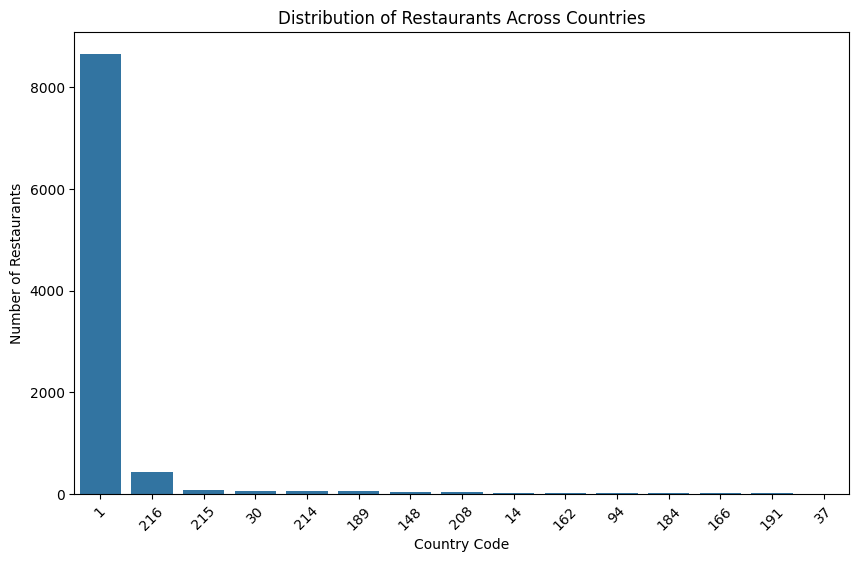


Top cities with the highest number of restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


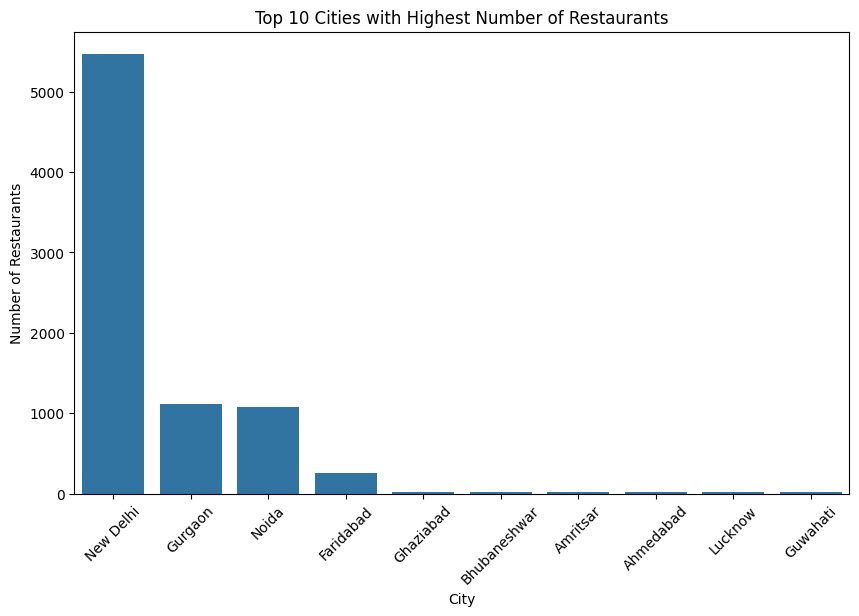


Correlation between Latitude and Aggregate rating: 0.0005155806902359908
Correlation between Longitude and Aggregate rating: -0.11681757734540431


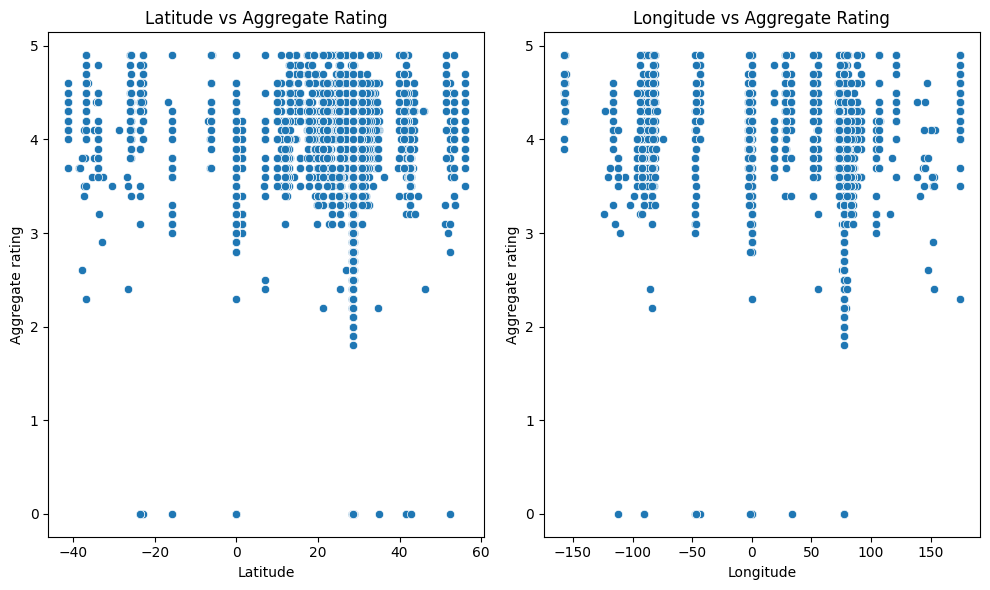

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster
import numpy as np

# Load the dataset (replace 'your_dataset.csv' with the actual dataset file path)
df = pd.read_csv('/content/Dataset .csv')

# Task 3.1: Visualize the locations of restaurants on a map using latitude and longitude
# Check if Latitude and Longitude columns exist
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    # Initialize a map centered around the mean latitude and longitude
    map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
    m = folium.Map(location=map_center, zoom_start=6)

    # Add markers for each restaurant (can be done efficiently with MarkerCluster for large datasets)
    marker_cluster = MarkerCluster().add_to(m)

    # Add restaurant locations as markers
    # Assuming the restaurant name is in a column called 'Restaurant Name'
    # If it's in a different column, replace 'Restaurant Name' with the correct column name
    for idx, row in df.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"Restaurant: {row['Restaurant Name']}, Rating: {row['Aggregate rating']}" # Changed 'Name' to 'Restaurant Name'
        ).add_to(marker_cluster)

    # Save or display the map
    m.save('restaurants_map.html')  # Save the map as an HTML file, which can be viewed in a browser
    # Display the map (works in Jupyter Notebooks or IPython environments)
    m


# Task 3.2: Analyze the distribution of restaurants across different cities or countries
# Distribution by Country (Country Code or similar)
if 'Country Code' in df.columns:
    country_counts = df['Country Code'].value_counts()
    print("\nDistribution of restaurants across countries:")
    print(country_counts)

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Country Code', data=df, order=country_counts.index)
    plt.title('Distribution of Restaurants Across Countries')
    plt.xlabel('Country Code')
    plt.ylabel('Number of Restaurants')
    plt.xticks(rotation=45)
    plt.show()

# Task 3.3: Analyze the distribution of restaurants across cities (if city column exists)
if 'City' in df.columns:
    city_counts = df['City'].value_counts().nlargest(10)  # Get top 10 cities
    print("\nTop cities with the highest number of restaurants:")
    print(city_counts)

    # Plot top cities
    plt.figure(figsize=(10, 6))
    sns.barplot(x=city_counts.index, y=city_counts.values)
    plt.title('Top 10 Cities with Highest Number of Restaurants')
    plt.xlabel('City')
    plt.ylabel('Number of Restaurants')
    plt.xticks(rotation=45)
    plt.show()

# Task 3.4: Determine if there is any correlation between the restaurant's location and its rating
# We will check if there is any relationship between latitude/longitude and aggregate rating
# Calculate correlation between latitude, longitude, and aggregate rating

if 'Latitude' in df.columns and 'Longitude' in df.columns and 'Aggregate rating' in df.columns:
    corr_latitude = df['Latitude'].corr(df['Aggregate rating'])
    corr_longitude = df['Longitude'].corr(df['Aggregate rating'])
    print(f"\nCorrelation between Latitude and Aggregate rating: {corr_latitude}")
    print(f"Correlation between Longitude and Aggregate rating: {corr_longitude}")

    # Visualizing the correlation using scatter plots
    plt.figure(figsize=(10, 6))

    # Latitude vs Aggregate rating
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='Latitude', y='Aggregate rating', data=df)
    plt.title('Latitude vs Aggregate Rating')

    # Longitude vs Aggregate rating
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='Longitude', y='Aggregate rating', data=df)
    plt.title('Longitude vs Aggregate Rating')

    plt.tight_layout()
    plt.show()
